In [1]:
import sklearn.datasets
import pandas as pd
import numpy as np
import umap

In [2]:
pendigits = sklearn.datasets.load_digits()
mnist = sklearn.datasets.fetch_openml('mnist_784')
fmnist = sklearn.datasets.fetch_openml('Fashion-MNIST')

In [3]:
mapper = umap.UMAP().fit(pendigits.data)

In [4]:
import umap.plot

c:\Users\blais\Documents\ML\venv2\lib\site-packages\numba\np\ufunc\dufunc.py:344: NumbaWarning: Compilation requested for previously compiled argument types ((uint32,)). This has no effect and perhaps indicates a bug in the calling code (compiling a ufunc more than once for the same signature
  warnings.warn(msg, errors.NumbaWarning)
c:\Users\blais\Documents\ML\venv2\lib\site-packages\numba\np\ufunc\dufunc.py:344: NumbaWarning: Compilation requested for previously compiled argument types ((uint32,)). This has no effect and perhaps indicates a bug in the calling code (compiling a ufunc more than once for the same signature
  warnings.warn(msg, errors.NumbaWarning)
c:\Users\blais\Documents\ML\venv2\lib\site-packages\numba\np\ufunc\dufunc.py:344: NumbaWarning: Compilation requested for previously compiled argument types ((uint32,)). This has no effect and perhaps indicates a bug in the calling code (compiling a ufunc more than once for the same signature
  warnings.warn(msg, errors.NumbaW

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:>

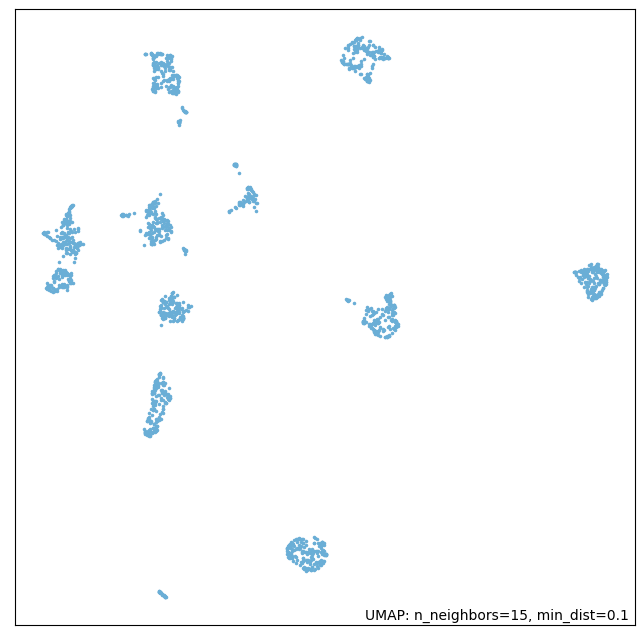

In [5]:
umap.plot.points(mapper)

<AxesSubplot:>

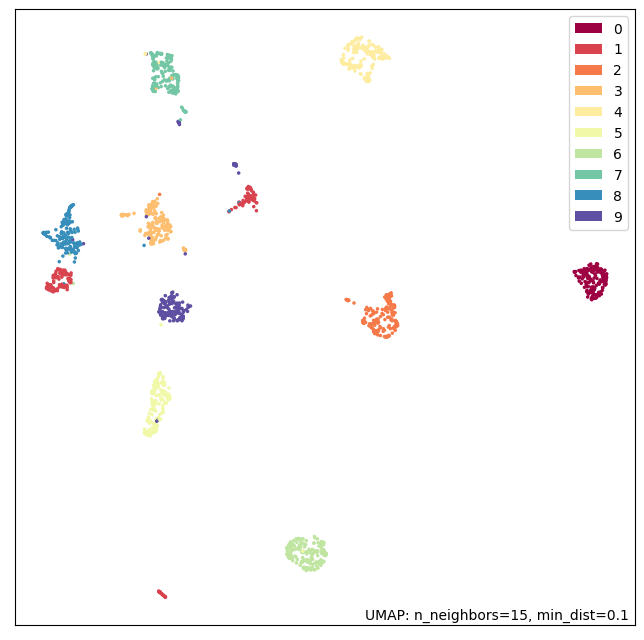

In [6]:
umap.plot.points(mapper, labels=pendigits.target)

<AxesSubplot:>

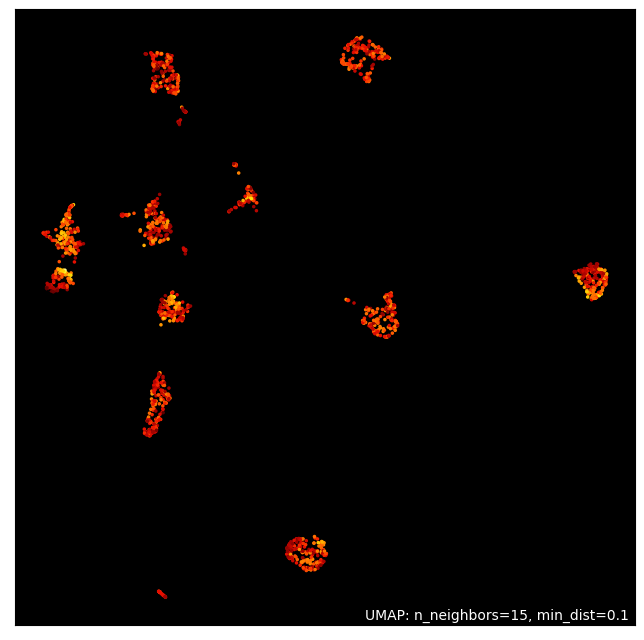

In [7]:
umap.plot.points(mapper, values=pendigits.data.mean(axis=1), theme='fire')

-- greater control => specify exact colormaps and background colors. 

<AxesSubplot:>

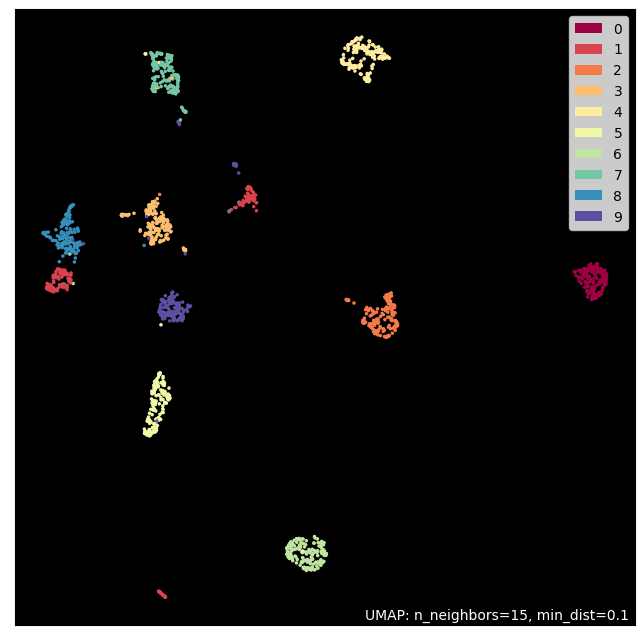

In [9]:
umap.plot.points(mapper, labels=pendigits.target, background='black')

<AxesSubplot:>

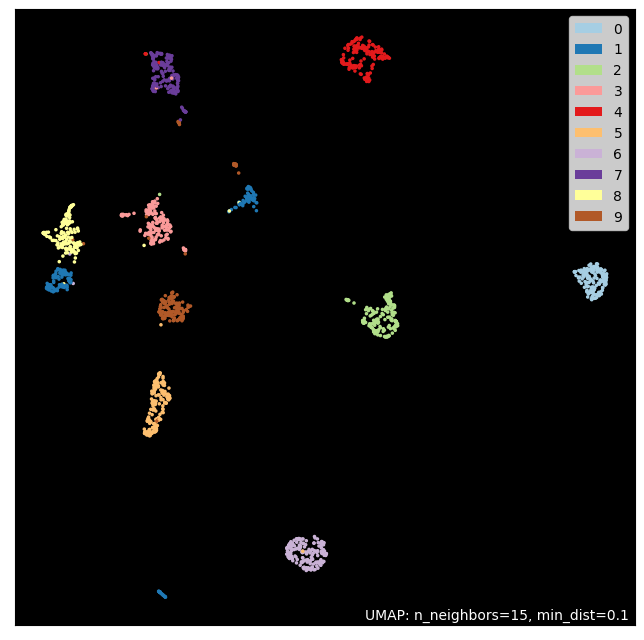

In [10]:
umap.plot.points(mapper, labels=pendigits.target, color_key_cmap='Paired', background='black')

**Plotting larger datasets:**

In [11]:
mapper = umap.UMAP().fit(fmnist.data)

<AxesSubplot:>

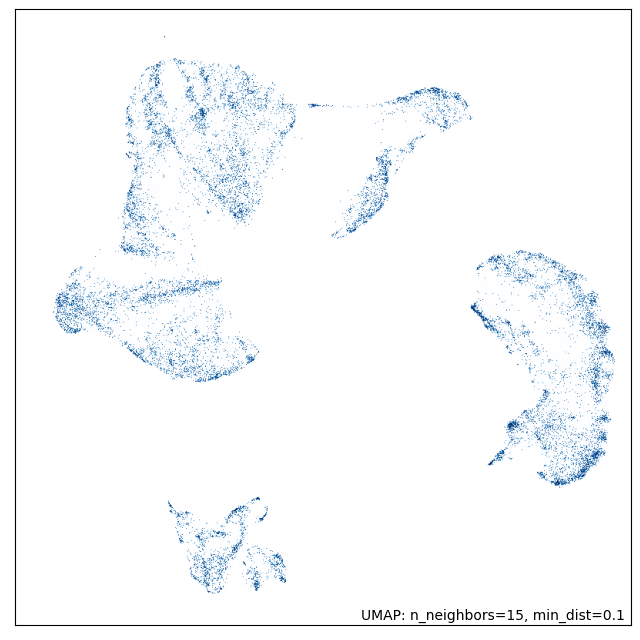

In [12]:
umap.plot.points(mapper)

<AxesSubplot:>

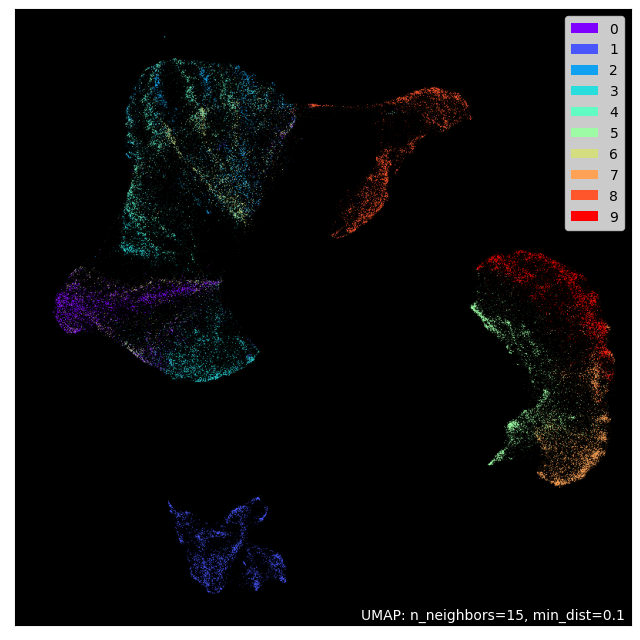

In [14]:
umap.plot.points(mapper, labels=fmnist.target, theme='fire')

**Interactive Plotting, and hover tools:**

In [15]:
mapper = umap.UMAP().fit(fmnist.data[:30000])

In [16]:
hover_data = pd.DataFrame({'index': np.arange(30000),'label':fmnist.target[:30000]})

In [17]:
hover_data['item'] = hover_data.label.map({
    '0':'T-shirt/top',
    '1':'Trouser',
    '2':'Pullover',
    '3':'Dress',
    '4':'Coat',
    '5':'Sandal',
    '6':'Shirt',
    '7':'Sneaker',
    '8':'Bag',
    '9':'Ankle Boot',
})

In [18]:
hover_data.head()

,index,label,item
0,0,9,Ankle Boot
1,1,0,T-shirt/top
2,2,0,T-shirt/top
3,3,3,Dress
4,4,0,T-shirt/top


In [19]:
umap.plot.output_notebook()

Loading BokehJS ...

In [20]:
p = umap.plot.interactive(mapper, labels=fmnist.target[:30000], hover_data=hover_data, point_size=2)
umap.plot.show(p)

**Plotting Connectivity:**

<AxesSubplot:>

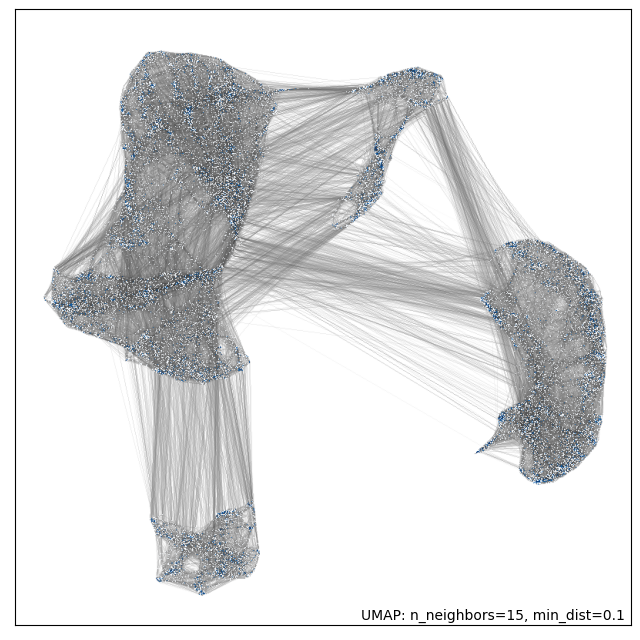

In [21]:
umap.plot.connectivity(mapper, show_points=True)